In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
#print(all_tweets.loc[0]['text'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')


In [3]:
print(all_tweets.loc[0]["user"])

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/995790590276243456/c

In [4]:
median_RT = all_tweets['retweet_count'].median()
print(median_RT)

13.0


In [5]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_RT, 1, 0)

print(all_tweets['is_viral'].value_counts())

0    5562
1    5537
Name: is_viral, dtype: int64


In [6]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1)

In [7]:
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis = 1)

In [8]:
all_tweets['number_hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)

In [9]:
labels = all_tweets['is_viral']
data = all_tweets[['number_hashtags','followers_count','friends_count']]
scaled_data = scale(data, axis=0)

print(scaled_data[0])

[-0.32045057 -0.02878298 -0.14483305]


In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

In [11]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

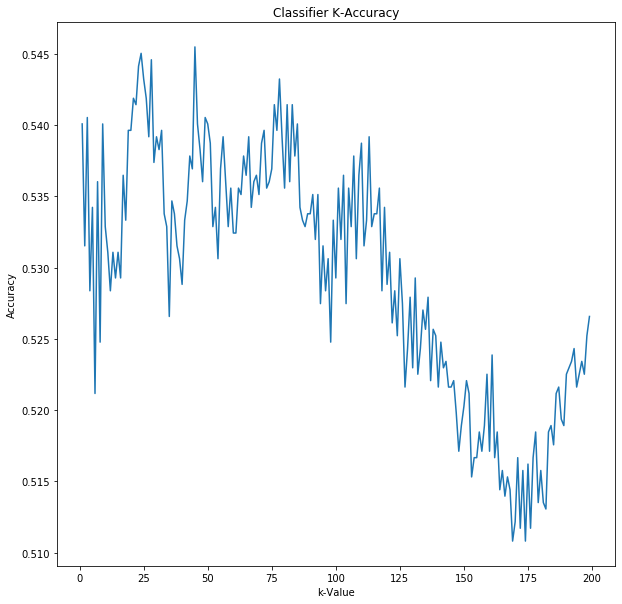

In [12]:
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.figure(figsize=(10,10))
plt.plot(range(1,200), scores)
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('Classifier K-Accuracy')

plt.show()